In [1]:
import numpy as np
import pandas as pd
from numpy.random import uniform,seed
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
weather = uniform(30,50,size=19)
weather[3] = np.nan
weather[4] = np.nan
date_rng = pd.date_range(start='2025-01-10',end='2025-01-28')
df = pd.DataFrame({"weather":weather},index=date_rng)

df = df.drop("2025-01-20")
df = df.drop("2025-01-26")
df

,weather
2025-01-10,37.490802
2025-01-11,49.014286
2025-01-12,44.639879
2025-01-13,NaN
2025-01-14,NaN
2025-01-15,33.119890
2025-01-16,31.161672
2025-01-17,47.323523
2025-01-18,42.022300
2025-01-19,44.161452


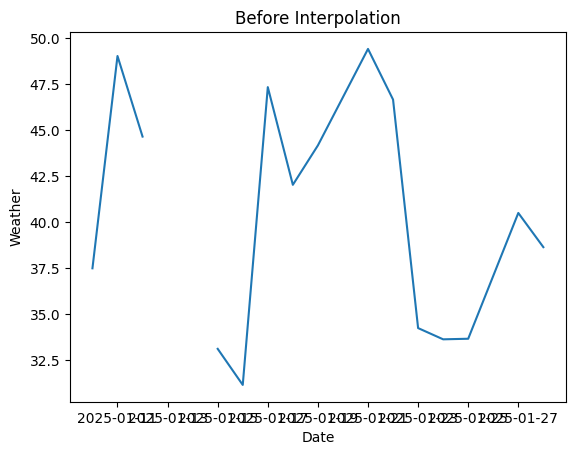

In [3]:
plt.plot(df.index,df.weather)
plt.title("Before Interpolation")
plt.xlabel("Date")
plt.ylabel("Weather")
plt.show()

## Handling missing row

In [4]:
full_date_range = pd.date_range(start='2025-01-10',end='2025-01-28')
df = df.reindex(full_date_range)
df

,weather
2025-01-10,37.490802
2025-01-11,49.014286
2025-01-12,44.639879
2025-01-13,NaN
2025-01-14,NaN
2025-01-15,33.119890
2025-01-16,31.161672
2025-01-17,47.323523
2025-01-18,42.022300
2025-01-19,44.161452


# Handling missing value

In [5]:
# Linear Interploation
df["linear"] = df["weather"].interpolate(method="linear")
# Polynomial Interpolation
df["polynomial"] = df["weather"].interpolate(method="polynomial",order=2)
# Spline Interpolation
df["spline"] = df["weather"].interpolate(method="spline",order=2)
df

,weather,linear,polynomial,spline
2025-01-10,37.490802,37.490802,37.490802,37.490802
2025-01-11,49.014286,49.014286,49.014286,49.014286
2025-01-12,44.639879,44.639879,44.639879,44.639879
2025-01-13,NaN,40.799883,40.025125,39.725428
2025-01-14,NaN,36.959887,37.248121,35.230322
2025-01-15,33.119890,33.119890,33.119890,33.119890
2025-01-16,31.161672,31.161672,31.161672,31.161672
2025-01-17,47.323523,47.323523,47.323523,47.323523
2025-01-18,42.022300,42.022300,42.022300,42.022300
2025-01-19,44.161452,44.161452,44.161452,44.161452


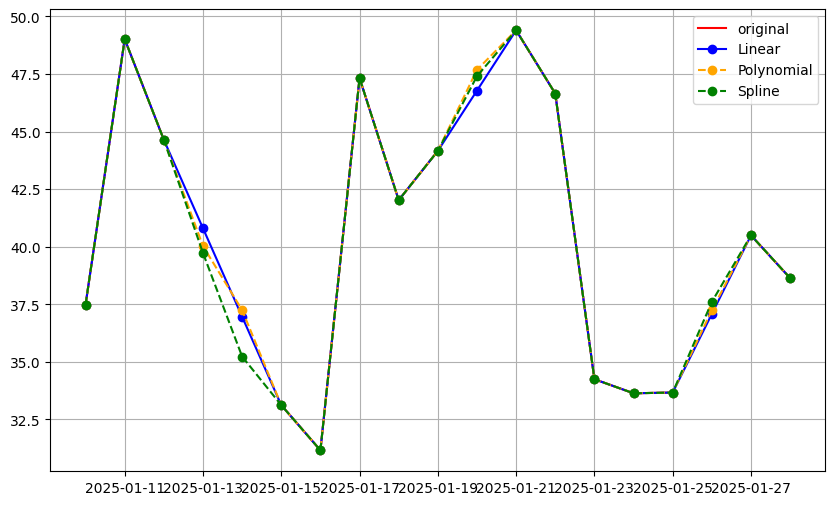

In [6]:
plt.figure(figsize=(10,6))
plt.plot(df.index,df["weather"],label="original",color="red")
plt.plot(df.index,df["linear"],'o-',label="Linear",color="blue")
plt.plot(df.index,df["polynomial"],'o--',label="Polynomial",color="orange")
plt.plot(df.index,df["spline"],'o--',label="Spline",color="Green")

plt.legend()
plt.grid()
plt.show()